In [70]:
import torch
import matplotlib.pyplot as plt
import json

In [71]:
def plot_output(output_dir, out_name, type='linear'):
    # Load the data
    train_history = torch.load(output_dir+f'train_history_{type}.pt')
    val_history = torch.load(output_dir+f'val_history_{type}.pt')

    # Assuming these are lists or tensors of metrics per epoch
    epochs = range(1, len(train_history) + 1)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_history, label='Training')
    plt.plot(epochs, val_history, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Metric')
    plt.legend()
    plt.savefig(out_name)
    plt.show()

### 10K Arxiv

#### Linear

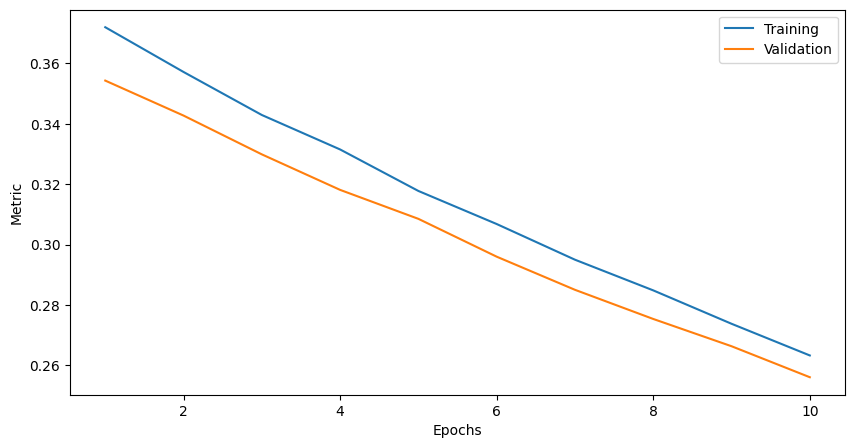

In [47]:
output_dir = 'source/output_fullarxiv/'
out_name = 'arxiv_linear_trainValid.png'
plot_output(output_dir, out_name)

In [61]:
with open(output_dir+'linear.json', 'r') as file:
    data = json.load(file)

print("Rouge 1: ", data['rouge1'])
print("Rouge 2: ", data['rouge2'])
print("Rouge Lsum: ", data['rougeLsum'])

Rouge 1:  0.43386428321637416
Rouge 2:  0.2925062002867076
Rouge Lsum:  0.3456945990564564


#### Transformer

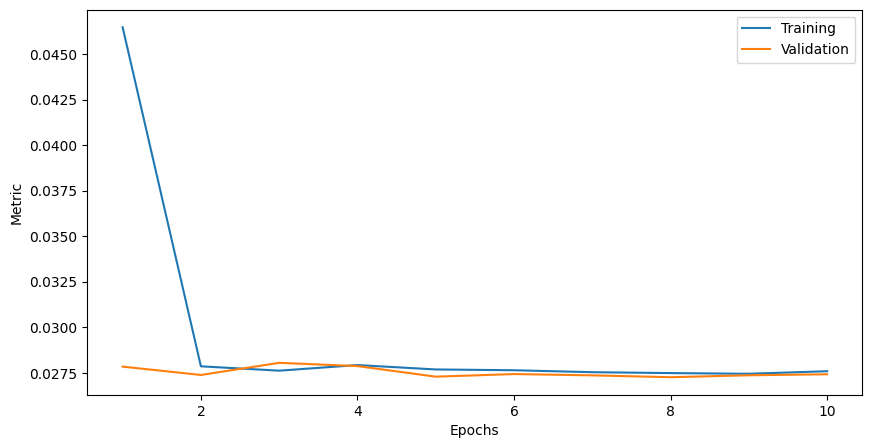

In [43]:
out_name = 'arxiv_transformer_trainValid.png'
plot_output(output_dir, out_name, type='transformer')

In [62]:
with open(output_dir+'transformer.json', 'r') as file:
    data = json.load(file)

print("Rouge 1: ", data['rouge1'])
print("Rouge 2: ", data['rouge2'])
print("Rouge Lsum: ", data['rougeLsum'])

Rouge 1:  0.4374239356195888
Rouge 2:  0.300581092408426
Rouge Lsum:  0.34919460264861274


### 10 epochs Dialogue

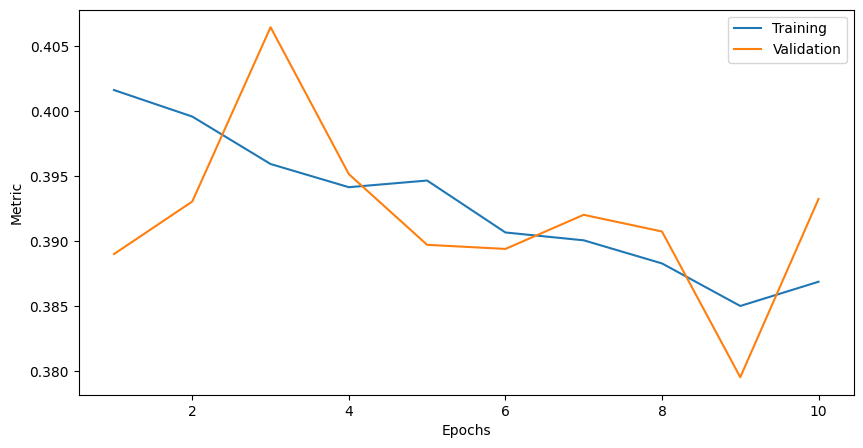

In [63]:
output_dir = 'source/output_dialogue10/'
out_name = 'dialogue_10epochs_linear_trainValid.png'
plot_output(output_dir, out_name, type='linear')

In [65]:
with open(output_dir+'linear.json', 'r') as file:
    data = json.load(file)

print("Rouge 1: ", data['rouge1'])
print("Rouge 2: ", data['rouge2'])
print("Rouge Lsum: ", data['rougeLsum'])

Rouge 1:  0.42023580010604467
Rouge 2:  0.29371506045398804
Rouge Lsum:  0.32482250595355744


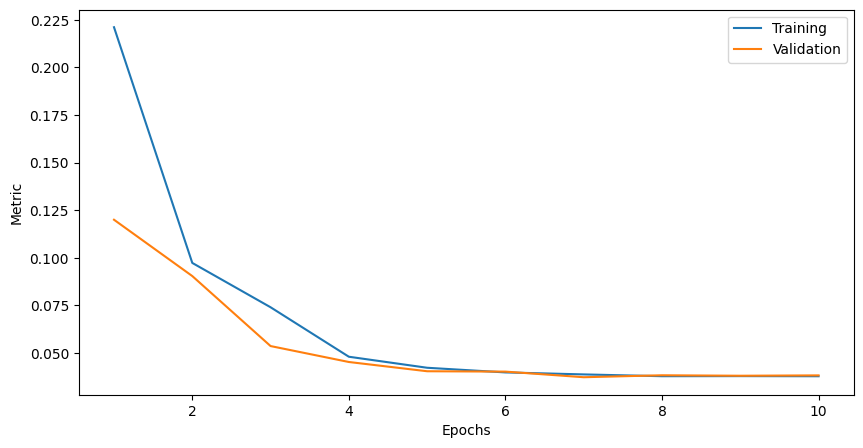

In [64]:
out_name = 'dialogue_10epochs_transformer_trainValid.png'
plot_output(output_dir, out_name, type='transformer')

In [67]:
with open(output_dir+'transformer.json', 'r') as file:
    data = json.load(file)

print("Rouge 1: ", data['rouge1'])
print("Rouge 2: ", data['rouge2'])
print("Rouge Lsum: ", data['rougeLsum'])

Rouge 1:  0.37493759311896135
Rouge 2:  0.24394041522087478
Rouge Lsum:  0.29397322417095817


### 100 epoch Dialogue

#### Linear

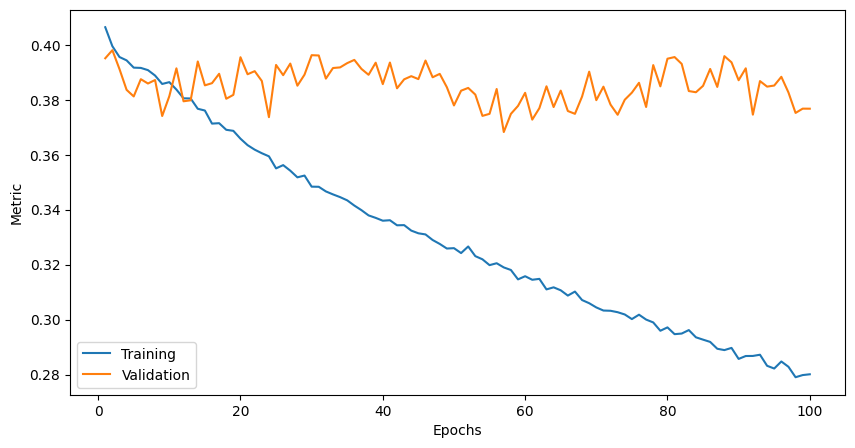

In [68]:
output_dir = 'source/output_dialogue100/'
out_name = 'dialogue_linear_trainValid.png'
plot_output(output_dir, out_name, type='linear')

In [69]:
with open(output_dir+'linear.json', 'r') as file:
    data = json.load(file)

print("Rouge 1: ", data['rouge1'])
print("Rouge 2: ", data['rouge2'])
print("Rouge Lsum: ", data['rougeLsum'])

Rouge 1:  0.4091097521136594
Rouge 2:  0.2821553636500356
Rouge Lsum:  0.3181224865639933


#### Transformer

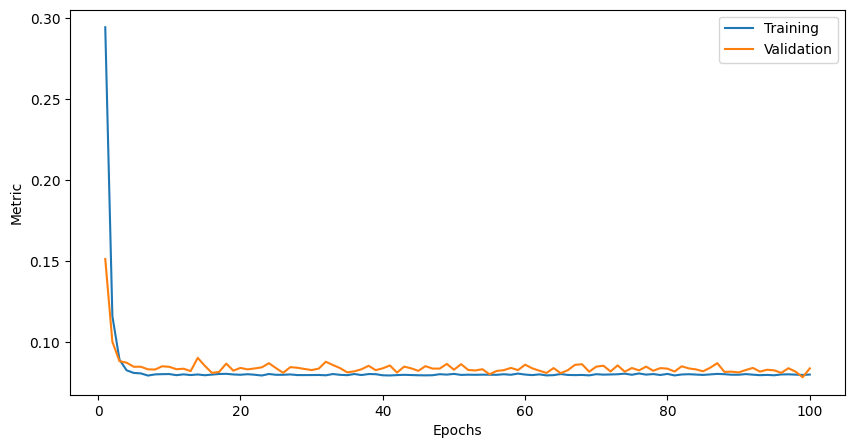

In [72]:
out_name = 'dialogue_transformer_trainValid.png'
plot_output(output_dir, out_name, type='transformer')

In [ ]:
with open(output_dir+'transformer.json', 'r') as file:
    data = json.load(file)

print("Rouge 1: ", data['rouge1'])
print("Rouge 2: ", data['rouge2'])
print("Rouge Lsum: ", data['rougeLsum'])

In [ ]:
# Assign colors to specific labels
colors = list(mcolors.TABLEAU_COLORS.values())
label_colors = {label:colors[i] for i,label in enumerate(labels)}

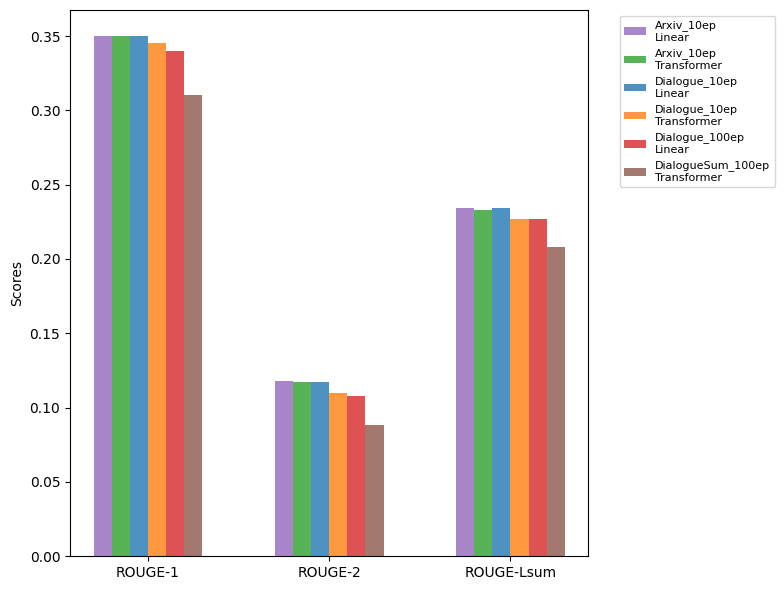

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager

# Data from the table
trained_datasets = [
    "Arxiv_10ep",
    "Arxiv_10ep",
    "Dialogue_10ep",
    "Dialogue_10ep",
    "Dialogue_100ep",
    "DialogueSum_100ep"
]
model_types = ["Linear", "Transformer", "Linear", "Transformer", "Linear", "Transformer"]
# rouge_1_scores = [0.434, 0.437, 0.439, 0.438, 0.436, 0.424]
# rouge_2_scores = [0.293, 0.301, 0.298, 0.295, 0.296, 0.287]
# rouge_lsum_scores = [0.346, 0.349, 0.348, 0.349, 0.347, 0.363]

# rouge_1_scores = [0.179, 0.186, 0.420, 0.375, 0.409, 0.139]
# rouge_2_scores = [0.118, 0.122, 0.294, 0.244, 0.282, 0.068]
# rouge_lsum_scores = [0.148, 0.141, 0.325, 0.294, 0.318, 0.114]

# rouge_1_scores = [0.350, 0.350, 0.345, 0.340, 0.350, 0.310]
# rouge_2_scores = [0.118, 0.117, 0.110, 0.108, 0.117, 0.088]
# rouge_lsum_scores = [0.234, 0.233, 0.227, 0.227, 0.234, 0.208]

rouge_1_scores_take_n_sents = [0.375, 0.352, 0.318, 0.347, 0.331, 0.338]
rouge_2_scores_take_n_sents = [0.132, 0.117, 0.092, 0.116, 0.099, 0.106]
rouge_lsum_scores_take_n_sents = [0.249, 0.239, 0.211, 0.237, 0.221, 0.230]

metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-Lsum"]


# sort based on rouge_1_score
combined_data = list(zip(trained_datasets, model_types, rouge_1_scores, rouge_2_scores, rouge_lsum_scores))
sorted_data = sorted(combined_data, key=lambda x: x[2], reverse=True)
trained_datasets, model_types, rouge_1_scores, rouge_2_scores, rouge_lsum_scores = zip(*sorted_data)

data = [[rouge_1_scores[i], rouge_2_scores[i], rouge_lsum_scores[i]] for i in range(len(rouge_1_scores))]
# Combining dataset and model type for x-axis labels
labels = [f"{ds}\n{mt}" for ds, mt in zip(trained_datasets, model_types)]

# # Assign colors to specific labels
# colors = list(mcolors.TABLEAU_COLORS.values())
# label_colors = {label:colors[i] for i,label in enumerate(labels)}

# Number of groups
n_groups = 3

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

for i, model in enumerate(data):
    ax.bar(index +i*bar_width, data[i], bar_width, alpha=opacity, color=label_colors[labels[i]], label=labels[i])

font = font_manager.FontProperties(size=8)

ax.set_ylabel('Scores')
ax.set_xticks(np.arange(3) + 2.5*bar_width, metrics)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop=font)

plt.tight_layout()
plt.savefig("fullArxiv_takeN_diffModels_metrics.png")
plt.show()